In [1]:
import numpy as np 
import os
import keras
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import auc, average_precision_score, confusion_matrix, roc_auc_score, f1_score, confusion_matrix, precision_recall_fscore_support


In [2]:
path1 = []
path2 = []
path3 = []
path4 = []

base_dir = r"D:\Downloads\Data"
for subdir, dirs, files in os.walk(base_dir):
    if 'Non Demented' in subdir:
        for file in files:
            path1.append(os.path.join(subdir, file))
    elif 'Mild Dementia' in subdir:
        for file in files:
            path2.append(os.path.join(subdir, file))
    elif 'Moderate Dementia' in subdir:
        for file in files:
            path3.append(os.path.join(subdir, file))
    elif 'Very mild Dementia' in subdir:
        for file in files:
            path4.append(os.path.join(subdir, file))

In [3]:

path1 = path1[0:100]
path2 = path2[0:100]
path3 = path3[0:100]
path4 = path4[0:100]

In [4]:

encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])


OneHotEncoder()

In [5]:
data = []
result = []
for path in path1:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
for path in path2:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray()) 
        
for path in path3:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())
        
for path in path4:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())   

In [6]:
data = np.array(data)
data.shape

(400, 128, 128, 3)

In [7]:
result = np.array(result)
result = result.reshape((400,4))
result.shape

(400, 4)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.15,shuffle = True,random_state=42)

In [9]:
model = Sequential()

model.add(Conv2D(32,kernel_size =(2,2),input_shape = (128,128,3),padding = 'Same'))
model.add(Conv2D(32,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))
model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
          
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
          
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adamax',metrics=['accuracy'])
          
print(model.summary())




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)      

In [10]:
y_train.shape


(340, 4)

In [11]:

x_train.shape

(340, 128, 128, 3)

In [12]:
history = model.fit(x_train,y_train,epochs = 10,batch_size=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10


34/34 [==============================] - 12s 299ms/step - loss: 11.0142 - accuracy: 0.7529 - val_loss: 1.1802 - val_accuracy: 0.8667
Epoch 2/10
34/34 [==============================] - 10s 290ms/step - loss: 0.4002 - accuracy: 0.9647 - val_loss: 0.1186 - val_accuracy: 0.9833
Epoch 3/10
34/34 [==============================] - 10s 292ms/step - loss: 0.2328 - accuracy: 0.9824 - val_loss: 1.2318e-07 - val_accuracy: 1.0000
Epoch 4/10
34/34 [==============================] - 10s 291ms/step - loss: 0.2421 - accuracy: 0.9765 - val_loss: 2.6183e-04 - val_accuracy: 1.0000
Epoch 5/10
34/34 [==============================] - 10s 291ms/step - loss: 0.0330 - accuracy: 0.9971 - val_loss: 1.7881e-08 - val_accuracy: 1.0000
Epoch 6/10
34/34 [==============================] - 10s 294ms/step - loss: 0.0454 - accuracy: 0.9971 - val_loss: 4.1723e-08 - val_accuracy: 1.0000
Epoch 7/10
34/34 [==============================] - 10s 295ms/step - loss: 0.0552 - accuracy: 0.9912 - val_loss: 5.1657e-08

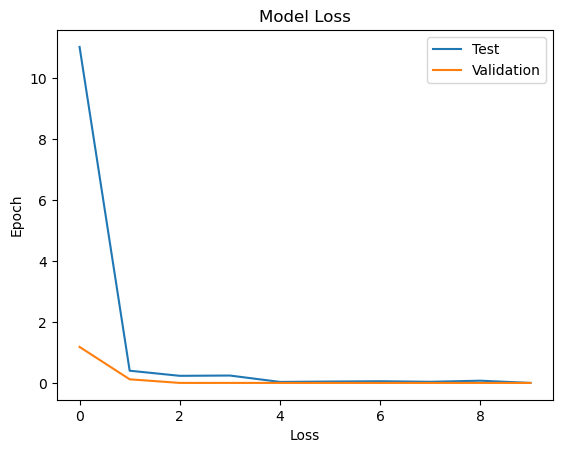

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()

In [14]:
def names(number):
    if number == 0:
        return 'Non Demented'
    elif number == 1:
        return 'Mild Dementia'
    elif number == 2:
        return 'Moderate Dementia'
    elif number == 3:
        return 'Very Mild Dementia'
    else:
        return 'Error in Prediction'

100.0% Confidence This Is Moderate Dementia


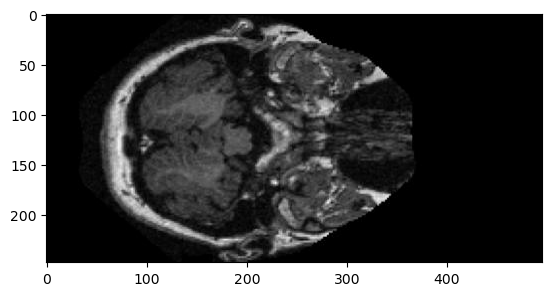

In [15]:

from matplotlib.pyplot import imshow
img = Image.open(r"D:\Downloads\Data\Moderate Dementia\OAS1_0308_MR1_mpr-1_101.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

100.0% Confidence This Is Moderate Dementia


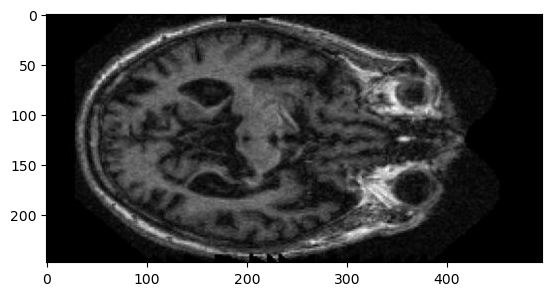

In [16]:

img = Image.open(r"D:\Downloads\Data\Moderate Dementia\OAS1_0351_MR1_mpr-4_147.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

2/2 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 236ms/epoch - 118ms/step
Test accuracy: 1.0


In [18]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
confusion_mtx = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
print("Confusion Matrix:\n", confusion_mtx)

2/2 [==============================] - 0s 55ms/step
Confusion Matrix:
 [[21  0  0  0]
 [ 0 14  0  0]
 [ 0  0 12  0]
 [ 0  0  0 13]]


In [19]:
f1_scores = f1_score(np.argmax(y_test, axis=1), y_pred_classes, average='weighted')
print("F1 Score:", f1_scores)

F1 Score: 1.0


In [20]:
from sklearn.metrics import precision_score
precision_scores = precision_score(np.argmax(y_test, axis=1), y_pred_classes, average='weighted')
print("Precision:", precision_scores)

Precision: 1.0


In [21]:
from sklearn.metrics import recall_score
recall_scores = recall_score(np.argmax(y_test, axis=1), y_pred_classes, average='weighted')
print("Recall:", recall_scores)

Recall: 1.0


In [22]:
import os

In [24]:
l=['Mild Dementia','Moderate Dementia','Very mild Dementia']
test_data = []
label = []
val_count = []

for i,item in enumerate(l):
    folder_path = r"D:\Downloads\archive (1)\test"
    folder_path += '\\'+ item
    list_item = []
    
    file_list = os.listdir(folder_path) 
    for file in file_list: 
        if file.endswith('.jpg') or file.endswith('.png'): 
            image = Image.open(os.path.join(folder_path, file)) 
            image = image.resize((128,128))
            image = np.array(image)
            if(image.shape == (128,128,3)):
                list_item.append(image)
    print(list_item[0].shape)
    test_data.append(np.array(list_item))
    label.append(np.ones(shape=(len(list_item,)),dtype=np.int64) * i)
    val_count.append(len(list_item))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\Downloads\\archive (1)\\test\\Mild Dementia'

In [43]:
from pathlib import Path

base_dir = Path(r"D:\Downloads\archive (1)\test")
path1 = list(base_dir.glob('Non Demented/**/*'))
path2 = list(base_dir.glob('Mild Dementia/**/*'))
path3 = list(base_dir.glob('Moderate Dementia/**/*'))
path4 = list(base_dir.glob('Very mild Dementia/**/*'))

In [42]:
data = np.array(test_data)
data.shape

(0,)

In [41]:
predictions = model.predict(test_data)

ValueError: Expected input data to be non-empty.

In [37]:
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])


OneHotEncoder()

In [38]:
test_data = []
result = []
for path in path5:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
for path in path6:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray()) 
        
for path in path7:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())
        
for path in path8:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray()) 

In [39]:
data = np.array(test_data)
data.shape

(0,)